In [13]:
import dill
import pandas as pd
from nba_stats import getTeamURLdict

cats = ['FG','FGA','3P','3PA','FT','FTA','TRB','AST','STL','BLK','TOV','Pts']
df=pd.DataFrame(columns=['Opp'+cat for cat in cats])
for team in getTeamURLdict(False):
    teampkl_source = 'pkl_obj/' + team.replace(" ", "") + '.dill'
    teamobj=dill.load(open(teampkl_source, 'r'))
    gamelog=teamobj.game_log['2018'] 
    df.loc[team,:]=gamelog[['Opp'+cat for cat in cats]].astype('float').mean()

In [7]:
import pandas as pd
df=pd.read_csv('teamRatings.csv',index_col=0) # averages of all teams
print df

                            OppFG     OppFGA      Opp3P     Opp3PA      OppFT  \
Los Angeles Lakers      41.048780  89.926829  10.426829  30.109756  17.097561   
Chicago Bulls           40.975610  86.768293  12.073171  32.658537  15.939024   
Philadelphia 76ers      38.048780  87.621951  10.109756  29.597561  19.097561   
San Antonio Spurs       38.182927  84.280488   9.146341  26.268293  14.329268   
Houston Rockets         39.560976  85.573171  10.109756  28.841463  14.646341   
Detroit Pistons         39.097561  85.219512  11.073171  30.817073  14.646341   
Boston Celtics          37.390244  85.036585   9.378049  27.682927  16.268293   
Miami Heat              37.682927  83.817073   9.573171  26.597561  18.000000   
Orlando Magic           40.914634  87.524390   9.987805  27.573171  16.402439   
Portland Trail Blazers  38.365854  85.878049   9.682927  26.573171  16.609756   
Golden State Warriors   40.195122  90.000000  10.402439  29.170732  16.695122   
New York Knicks         39.4

In [17]:
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.transform import factor_cmap
from bokeh.io import show, output_notebook, curdoc
from bokeh.models import ColumnDataSource, Whisker, Callback, CustomJS, Label
from bokeh.plotting import figure
import bokeh.layouts as layouts
import bokeh.models.widgets as widgets

#from bokeh.charts import BoxPlot, output_file, show
from bokeh.layouts import row
output_notebook()

#box = BoxPlot(df, values='mpg', label='cyl', title="Auto MPG Box Plot", plot_width=400)

#show(box)

Loading BokehJS ...

In [3]:
df

,OppFG,OppFGA,Opp3P,Opp3PA,OppFT,OppFTA,OppTRB,OppAST,OppSTL,OppBLK,OppTOV,OppPts
Los Angeles Lakers,41.048780,89.926829,10.426829,30.109756,17.097561,22.475610,44.817073,23.560976,8.317073,5.451220,13.646341,109.621951
Chicago Bulls,40.975610,86.768293,12.073171,32.658537,15.939024,20.243902,45.658537,25.890244,7.170732,5.170732,12.975610,109.963415
Philadelphia 76ers,38.048780,87.621951,10.109756,29.597561,19.097561,25.634146,42.182927,21.731707,8.500000,5.085366,13.695122,105.304878
San Antonio Spurs,38.182927,84.280488,9.146341,26.268293,14.329268,18.890244,42.524390,21.780488,7.585366,3.878049,13.560976,99.841463
Houston Rockets,39.560976,85.573171,10.109756,28.841463,14.646341,19.634146,42.048780,22.402439,7.426829,4.426829,13.963415,103.878049
Detroit Pistons,39.097561,85.219512,11.073171,30.817073,14.646341,18.890244,43.768293,25.170732,7.280488,4.853659,14.170732,103.914634
Boston Celtics,37.390244,85.036585,9.378049,27.682927,16.268293,21.317073,43.841463,21.268293,7.243902,4.439024,13.536585,100.426829
Miami Heat,37.682927,83.817073,9.573171,26.597561,18.000000,22.987805,43.097561,20.975610,7.512195,4.609756,13.634146,102.939024
Orlando Magic,40.914634,87.524390,9.987805,27.573171,16.402439,21.231707,45.853659,24.365854,7.792683,4.902439,13.524390,108.219512
Portland Trail Blazers,38.365854,85.878049,9.682927,26.573171,16.609756,22.000000,42.902439,20.182927,7.341463,5.097561,12.341463,103.024390


In [31]:
import numpy as np
from bokeh.plotting import figure, show, output_file
import pandas as pd

def plotTeamRating(team, cat):
    cats=[cat]
    df=pd.read_csv('teamRatings.csv',index_col=0) # averages of all teams
    df=df[cats]
    # find the quartiles and IQR for each category
    q1 = df.quantile(q=0.25)
    q2 = df.quantile(q=0.5)
    q3 = df.quantile(q=0.75)
    iqr = q3 - q1

    p = figure(tools="save", background_fill_color="#EFE8E2", title="All NBA Teams: Rating for " +cat, 
               x_range=cats)
    
    # if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
    qmin = df.quantile(q=0.00)
    qmax = df.quantile(q=1.00)

    # stems
    p.segment(cats, qmax, cats, q3[cats], line_color="black")
    p.segment(cats, qmin, cats, q1[cats], line_color="black")

    # boxes
    p.vbar(cats, 0.7, q2[cats], q3[cats], fill_color="#E08E79", line_color="black")
    p.vbar(cats, 0.7, q1[cats], q2[cats], fill_color="#3B8686", line_color="black")

    # whiskers (almost-0 height rects simpler than segments)
    p.rect(cats, qmin, 0.5, 0.01, line_color="black")
    p.rect(cats, qmax, 0.5, 0.01, line_color="black")
    
    # add team
    p.rect(cats, df.loc[team,cat],1, 0.01, line_color="red")
    team_text = Label(x=0.18, y=df.loc[team,cat], text=team, text_color='red',text_font_size='16pt')
    p.add_layout(team_text)

    #labels
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = "white"
    p.grid.grid_line_width = 2
    p.xaxis.major_label_text_font_size="16pt"
    p.yaxis.axis_label_text_font_size="16pt"
    p.yaxis.major_label_text_font_size="16pt"
    p.title.text_font_size="16pt"
    return p

p=plotTeamRating('Utah Jazz', 'OppFGA')
show(p)

In [115]:
p

Figure(id='38b4240d-8479-4591-848a-1309386c468c', ...)

In [118]:
cats=['OppFG']
df=pd.read_csv('teamRatings.csv',index_col=0) # averages of all teams
df=df[cats]
# find the quartiles and IQR for each category
q1 = df.quantile(q=0.25)
q2 = df.quantile(q=0.5)
q3 = df.quantile(q=0.75)
iqr = q3 - q1

p = figure(background_fill_color="#EFE8E2", title="All NBA Teams: Rating for ")
show(p)

AttributeError: 'NoneType' object has no attribute 'references'

In [59]:
upper, lower

(OppFG    44.765244
 dtype: float64, OppFG    34.618902
 dtype: float64)

In [65]:
df[cats].describe()

,OppFG
count,30.000000
mean,39.607724
std,1.463271
min,37.146341
25%,38.423780
50%,39.408537
75%,40.960366
max,41.817073


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()


In [106]:
%matplotlib inline

def teamRatingPlot(team,cat):
    ax=sns.boxplot(x=df['Opp'+cat])
    plt.axvline(x=df.loc[team,'Opp'+cat], color='r')

    min_value= min(df['Opp'+cat])
    max_value= max(df['Opp'+cat])
    upper_quartile=np.percentile(df['Opp'+cat], 75)
    avg_value= df['Opp'+cat].mean()
    team_value=df.loc[team,'Opp'+cat]
    team_val=df.loc[team,'Opp'+cat]
    xytext=(team_value+0.02*(max_value-min_value), -0.435)

    ax.annotate(team, xy=(team_value, -0.3), xytext=xytext,  
                fontsize=12, color='r')
    plt.title('All NBA Teams: Rating for ' +cat, fontsize=20, y=1.05)
    return ax

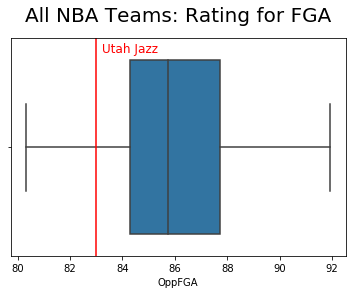

In [109]:
cat='FGA'
team='Utah Jazz'
teamRatingPlot(team,cat)
